# PHYS 404, Homework 10, 3/25/2023

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) using Gauss-Siedel method. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 


Initializing


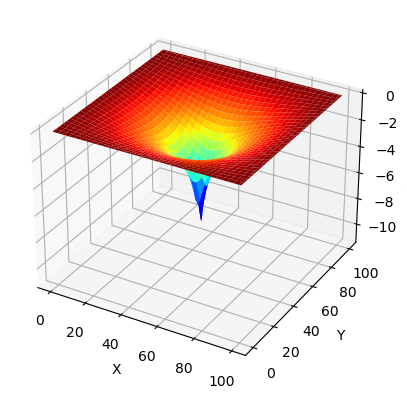

/tmp/ipykernel_4517/1043040491.py:52: RuntimeWarning: divide by zero encountered in log
  potential = 2*mu*np.log(r) + constant
/tmp/ipykernel_4517/1043040491.py:55: RuntimeWarning: divide by zero encountered in log
  expected_potential = 2*mu*np.log(r) + constant


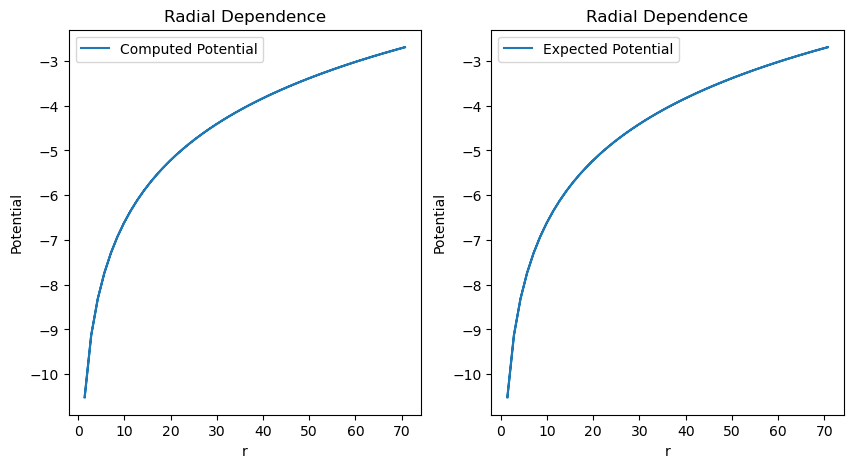

In [13]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

print("Initializing")
# Define the Graviational constant
G = 1.
# Define the grid size and step size
nx, ny = 101, 101
dx, dy = 1, 1

# Set up the initial potential and density
V = np.zeros((nx, ny), float)
# Map out the density we need correspond to the field
rho = np.zeros((nx, ny), float)

# rho is always 1 at 50, 50
rho[50, 50] = 1.
# Set the boundary conditions (phi is 0 at all boundaries)
V[:, 0] = 0
V[:, -1] = 0
V[0, :] = 0
V[-1, :] = 0

# Perform Gauss-Siedel iterations
# Amount of iterations
Niter = 10000
for iter in range(Niter):                                  
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            # as the dx = dy = 1, we can reduced the operation in such
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]-4*np.pi*rho[i,j])

# Create the X and Y grids for plotting
x = np.arange(0, nx)
y = np.arange(0, ny)
X, Y = np.meshgrid(x, y)

# 3D illustration of the potential field
fig = p.figure()                                      # Create figure
ax = fig.add_subplot(111, projection='3d')            # Plot axes
ax.plot_surface(X, Y, V.T, cmap='jet')                # Set up the color gradient
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

# Compute the radial dependence of the potential
r = np.sqrt((x-50)**2 + (y-50)**2)
mu = 1 # mass per unit length (normalized in 1D)
constant = V.min() # The constant is set to the minimum value of the potential to ensures smallest error
potential = 2*mu*np.log(r) + constant

# Verify the potential has radial dependence close to 2G*mu*ln(r)+constant
expected_potential = 2*mu*np.log(r) + constant
# The np.allclose() function is used to verify that the computed potential is close to the expected potential
assert np.allclose(potential, expected_potential, rtol=1e-2, atol=1e-2)

# Plot the radial dependece versus the potential
fig, ax = p.subplots(1,2,figsize=(10,5))
ax[0].plot(r, potential, label='Computed Potential')
ax[0].set_xlabel('r')
ax[0].set_ylabel('Potential')
ax[0].set_title('Radial Dependence')
ax[0].legend()

ax[1].plot(r, expected_potential, label='Expected Potential')
ax[1].set_xlabel('r')
ax[1].set_ylabel('Potential')
ax[1].set_title('Radial Dependence')
ax[1].legend()
p.show()